In [110]:
import os
import sys
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import re

In [2]:
cp_info = pd.read_csv("company_info.csv")

In [74]:
cp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19396 entries, 0 to 19395
Data columns (total 5 columns):
date_found       19396 non-null object
number_people    19396 non-null object
location         19396 non-null object
series           19396 non-null object
number_invest    19396 non-null object
dtypes: object(5)
memory usage: 378.9+ KB


In [20]:
cp_info.columns = ['date_found', 'number_people', 'location', 'series', 'number_invest']

In [21]:
cp_info.head()

,date_found,number_people,location,series,number_invest
0,0,0,0,0,0
1,2017-04-26,0,0,0,0
2,2016-11-01,0,대한민국 서울특별시 강남구 대치동 영동대로 417 구글캠퍼스,0,0
3,2014-01-09,0,0,0,0
4,2016-07-01,0,0,0,0


In [33]:
info = cp_info[(cp_info['date_found'] != '0') & (cp_info['location'] != '0')]

In [34]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 2 to 19393
Data columns (total 5 columns):
date_found       2303 non-null object
number_people    2303 non-null object
location         2303 non-null object
series           2303 non-null object
number_invest    2303 non-null object
dtypes: object(5)
memory usage: 63.0+ KB


In [35]:
info.head()

,date_found,number_people,location,series,number_invest
2,2016-11-01,0,대한민국 서울특별시 강남구 대치동 영동대로 417 구글캠퍼스,0,0
10,2008-02-01,0,대한민국 서울특별시 성동구 왕십리로2길 20 카우앤독 3층,0,0
14,2016-03-21,1-10명,대한민국 서울특별시 창천동 114A,0,0
18,2015-11-19,0,대한민국 서울특별시 종로구 종로1.2.3.4가동 종로 6 광화문 우체국 빌딩 5층 ...,0,0
40,2015-08-01,1-10명,대한민국 서울특별시 금천구 가산디지털1로 196 에이스테크노타워10차 603호,0,0


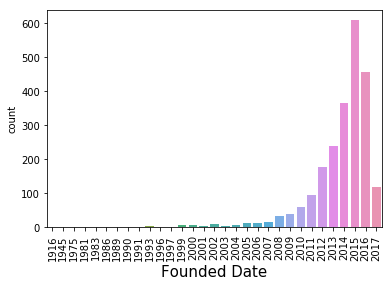

In [52]:
sns.countplot(sorted(info['date_found'].apply(lambda x: x.split('-')[0])))
plt.xticks(rotation = 'vertical')
plt.xlabel('Founded Date', size = 15)
plt.show()

In [76]:
df_cp = pd.read_csv("RocketPunch.csv")

In [78]:
df_cp = pd.DataFrame(df_cp.groupby('name')['url'].apply(list))
df_cp['url'] = df_cp.url.apply(lambda x: x[0])
df_cp.reset_index(inplace = True)

In [80]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19396 entries, 0 to 19395
Data columns (total 2 columns):
name    19396 non-null object
url     19396 non-null object
dtypes: object(2)
memory usage: 151.6+ KB


In [82]:
df = pd.merge(df_cp.reset_index(), info.reset_index(), on ='index', how= 'right')

In [139]:
df.head()

,index,name,url,date_found,number_people,location,series,number_invest,district
0,2,'윌슨'프로젝트,https://www.rocketpunch.com/companies/yebicang...,2016-11-01,0,대한민국 서울특별시 강남구 대치동 영동대로 417 구글캠퍼스,0,0,"[대한민국, 서울특별시, 강남구, 대치동, 영동대로, 417, 구글캠퍼스]"
1,10,(유)에스오피오오엔지,https://www.rocketpunch.com/companies/sopoong-2,2008-02-01,0,대한민국 서울특별시 성동구 왕십리로2길 20 카우앤독 3층,0,0,"[대한민국, 서울특별시, 성동구, 왕십리로2길, 20, 카우앤독, 3층]"
2,14,(주),https://www.rocketpunch.com/companies/solgit,2016-03-21,1-10명,대한민국 서울특별시 창천동 114A,0,0,"[대한민국, 서울특별시, 창천동, 114A]"
3,18,(주)GGumikun,https://www.rocketpunch.com/companies/ju-ggumikun,2015-11-19,0,대한민국 서울특별시 종로구 종로1.2.3.4가동 종로 6 광화문 우체국 빌딩 5층 ...,0,0,"[대한민국, 서울특별시, 종로구, 종로1.2.3.4가동, 종로, 6, 광화문, 우체..."
4,40,(주)글로벌링커스,https://www.rocketpunch.com/companies/globalli...,2015-08-01,1-10명,대한민국 서울특별시 금천구 가산디지털1로 196 에이스테크노타워10차 603호,0,0,"[대한민국, 서울특별시, 금천구, 가산디지털1로, 196, 에이스테크노타워10차, ..."


## 네이버 API # 주소 >>> 좌표 변환

In [54]:
client_id = "*******"
client_secret = "********"

In [189]:
def address_to_axis(address):
    encText = urllib.parse.quote(address)
    url = "https://openapi.naver.com/v1/map/geocode?query=" + encText # json 결과

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    if(rescode==200):
        data_info = json.load(response)
        address_info = data_info['result']['items'][0]['address']
        axis_x = data_info['result']['items'][0]['point']['x']
        axis_y = data_info['result']['items'][0]['point']['y']
        
    else:
        address_info = 'ERROR_CODE'
        axis_x = 'ERROR_CODE'
        axis_y = 'ERROR_CODE'
        
    return (address_info, axis_x, axis_y)

In [286]:
lst_info_addr = list()
lst_axis_x = list()
lst_axis_y = list()

for i,_ in enumerate(list(df.location)):
    
    try:
        info_, x_, y_ = address_to_axis(_)
        
    except:
        dst_si = re.findall(r'\b[0-9|가-힣]+시',_)
        dst_dn = re.findall(r'\b[0-9|가-힣]+동',_)
        dst_st = re.findall(r'\b[0-9|가-힣]+길',_)
        dst_ro = re.findall(r'\b[0-9|가-힣]+로',_)
                        
        if (len(dst_si) > 0) & (len(dst_st) + len(dst_ro) > 0):
            try:
                _ = ' '.join(map(str, dst_si+dst_ro+dst_st))
                info_, x_, y_ = address_to_axis(_)
            except: pass
            
        elif (len(dst_si) > 0) & (len(dst_dn) > 0):
            try:
                _ = ' '.join(map(str, dst_si+dst_dn))
                info_, x_, y_ = address_to_axis(_)
            except: pass

        else :        
            info_ = 'ERROR_CODE'
            x_ = 'ERROR_CODE'
            y_ = 'ERROR_CODE'
            print('예외처리')
        
    lst_info_addr.append(info_)
    lst_axis_x.append(x_)
    lst_axis_y.append(y_)
    print(i,' 완료',': ',info_)
    
    
df['address'] = lst_info_addr
df['axis_x'] = lst_axis_x
df['axis_y'] = lst_axis_y

0  완료 :  서울특별시 강남구 영동대로
1  완료 :  서울특별시 성동구 왕십리로2길 20
2  완료 :  서울특별시 서대문구 창천동 114-1
3  완료 :  서울특별시 서대문구 창천동 114-1
4  완료 :  서울특별시 금천구 가산디지털1로 196 에이스테크노타워10차
5  완료 :  서울특별시 강남구 도산대로55길 46
6  완료 :  서울특별시 서초구 반포동
7  완료 :  서울특별시 서초구 반포동
8  완료 :  서울특별시 종로구 청계천로
9  완료 :  제주특별자치도 제주시 제주대학로 102
10  완료 :  대구광역시 서구 와룡로72길 67
11  완료 :  서울특별시 강남구 봉은사로5길 12 샤넬빌딩
12  완료 :  서울특별시 서초구 양재1동 108-3
13  완료 :  서울특별시 마포구 성암로
14  완료 :  서울특별시 광진구 광나루로 416 건회빌딩
15  완료 :  서울특별시 송파구 신천동 7-11
16  완료 :  서울특별시 강남구 역삼동 739-16
17  완료 :  서울특별시 서대문구 연세로
18  완료 :  서울특별시 광진구 능동로 120 건국대학교
19  완료 :  서울특별시 영등포구 여의도동 13-13
20  완료 :  서울특별시 강남구 강남대로 560 삼익전자빌딩
21  완료 :  서울특별시 마포구 토정로 28 한이빌딩
22  완료 :  서울특별시 마포구 상암동 1605
23  완료 :  서울특별시 성동구 광나루로 286 아인빌딩
24  완료 :  서울특별시 서초구 서초2동 1364-11
25  완료 :  부산광역시 영도구 신선로
26  완료 :  서울특별시 강남구 논현로18길 11 제일빌딩
27  완료 :  서울특별시 마포구 동교동 146-8
28  완료 :  서울특별시 영등포구 여의나루로 96 문화방송(주)빌딩
29  완료 :  경기도 성남시 분당구 판교로228번길 17 판교세븐벤처밸리2
30  완료 :  서울특별시 마포구 공덕동 370-4
31  완료 :  서울특별시 송파구 문정동 2
32  완료 :  서울특별시 

253  완료 :  서울특별시 강남구 역삼1동 789-30
254  완료 :  서울특별시 강남구 청담동 126-18
255  완료 :  경기도 성남시 분당구 수내동 16-5
256  완료 :  서울특별시 구로구 벚꽃로
257  완료 :  서울특별시 종로구 필운대로1길 42
258  완료 :  서울특별시 송파구 올림픽로 82 잠실현대빌딩
259  완료 :  서울특별시 강남구 강남대로94길
260  완료 :  서울특별시 서초구 잠원동 18-1
261  완료 :  서울특별시 성북구 종암동
262  완료 :  서울특별시 강남구 영동대로112길 36
263  완료 :  서울특별시 동대문구 경희대로 26 경희대학교,경희초,중,고,여자중고등학교
264  완료 :  서울특별시 강남구 역삼1동 619-6
265  완료 :  서울특별시 강남구 논현로 537 명뷰티프라자빌딩
266  완료 :  서울특별시 서초구 고무래로 6-6 선경빌딩
267  완료 :  경기도 안양시 동안구 비산동
268  완료 :  서울특별시 강남구 역삼동 718-10
269  완료 :  서울특별시 영등포구 양평동
270  완료 :  서울특별시 강남구 도산대로 207 성도빌딩
271  완료 :  대구광역시 동구 동대구로 471 대구콘텐츠센터
272  완료 :  서울특별시 강남구 논현로 712 동호빌딩
273  완료 :  제주특별자치도 제주시 유수암로 225
274  완료 :  경기도 구리시 딸기원로 105
275  완료 :  서울특별시 마포구 백범로31길 21 서울창업허브, 서울복지타운
276  완료 :  서울특별시 마포구 합정동 414-20
277  완료 :  서울특별시 강남구 역삼동 747-5
278  완료 :  서울특별시 강남구 역삼동 747-5
279  완료 :  서울특별시 중구 서소문로 115 한산빌딩
280  완료 :  서울특별시 강남구 논현동 118-13
281  완료 :  서울특별시 강남구 논현동 118-13
282  완료 :  서울특별시 관악구 봉천동
283  완료 :  서울특별시 금천구 디지

505  완료 :  서울특별시 서초구 사임당로 86 상록빌딩
506  완료 :  서울특별시 동작구 사당동
507  완료 :  서울특별시 강남구 테헤란로 146 현익빌딩
508  완료 :  서울특별시 서초구 강남대로 311 한화생명보험빌딩
509  완료 :  서울특별시 강남구 신사동 651-9
510  완료 :  경기도 성남시 분당구 대왕판교로645번길 14 네오위즈
511  완료 :  서울특별시 마포구 서교동 364-10
512  완료 :  서울특별시 강남구 논현1동 5-18
513  완료 :  서울특별시 강남구 논현1동 5-18
514  완료 :  광주광역시 동구 동계천로 150 I-PLEX 광주
515  완료 :  경기도 용인시 수지구 동천동 319-2
516  완료 :  경기도 고양시 덕양구 행신3동 968-10
517  완료 :  서울특별시 서초구 서초대로78길 22 홍우빌딩
518  완료 :  서울특별시 종로구 율곡로 6 트윈 트리 빌딩
예외처리
519  완료 :  ERROR_CODE
520  완료 :  서울특별시 중구 북창동
521  완료 :  서울특별시 서대문구 창천동 20-41
522  완료 :  서울특별시 중구 순화동 5-2
523  완료 :  서울특별시 서대문구 연세로5다길 10
524  완료 :  서울특별시 마포구 연남동 369-20
525  완료 :  경기도 하남시 조정대로 150 아이테코
526  완료 :  인천광역시 연수구 송도동
527  완료 :  서울특별시 서초구 반포대로20길 36 화성빌딩
528  완료 :  서울특별시 서초구 서초대로 356 서초지웰타워
529  완료 :  서울특별시 강남구 역삼1동 828-26
530  완료 :  서울특별시 강남구 선릉로 551 새롬빌딩
531  완료 :  경기도 성남시 분당구 성남대로 333 정자역
532  완료 :  서울특별시 강남구 역삼1동 621-2
533  완료 :  서울특별시 강남구 선릉로 513 APEXTOWER
534  완료 :  서울특별시 마포구 서교동 355-29
535  완료

754  완료 :  서울특별시 서초구 서초동 1358-8
755  완료 :  서울특별시 강남구 삼성동 157-8
756  완료 :  경기도 성남시 분당구 삼평동
757  완료 :  경기도 수원시 영통구 덕영대로 1731 애지원기숙사
758  완료 :  대전광역시 유성구 대학로
759  완료 :  서울특별시 성동구 서울숲4길 21 예원빌딩
760  완료 :  서울특별시 강남구 논현동 105-7
761  완료 :  서울특별시 송파구 가락동 600-1
762  완료 :  서울특별시 강남구 논현1동 48-2
763  완료 :  서울특별시 강남구 논현1동 48-2
764  완료 :  서울특별시 서초구 사임당로1길 7 세현빌딩
765  완료 :  서울특별시 중구 삼일대로 343 대신파이낸스센터
766  완료 :  서울특별시 강남구 역삼로17길 51 미드타운센터 역삼
767  완료 :  서울특별시 서초구 강남대로83길 36 학산빌딩
768  완료 :  대전광역시 유성구 탑립동 706
769  완료 :  서울특별시 강남구 테헤란로37길 26
770  완료 :  서울특별시 강남구 선릉로125길 8
771  완료 :  서울특별시 강남구 역삼1동 646-20
772  완료 :  서울특별시 강남구 논현로 509 송암II빌딩
773  완료 :  서울특별시 서초구 서초2동
774  완료 :  서울특별시 강남구 개포로25길 8
775  완료 :  부산광역시 해운대구 우동 1457
776  완료 :  부산광역시 해운대구 우동 1457
777  완료 :  서울특별시 강남구 역삼로 180 MARU 180
778  완료 :  서울특별시 금천구 벚꽃로 234 에이스하이엔드타워6차
779  완료 :  서울특별시 마포구 새창로 11
780  완료 :  서울특별시 강남구 논현로77길 9
781  완료 :  서울특별시 마포구 합정동 364-27
782  완료 :  서울특별시 구로구 디지털로30길 28 마리오타워
783  완료 :  서울특별시 마포구 홍익로5안길 28 스퀘어 빌
784  완료 :  서울특

1003  완료 :  서울특별시 강남구 수서동 713
1004  완료 :  서울특별시 은평구 녹번동 산1-55
1005  완료 :  서울특별시 강남구 논현1동 141-9
1006  완료 :  서울특별시 서초구 강남대로 373 홍우빌딩
1007  완료 :  대구광역시 동구 동대구로
1008  완료 :  서울특별시 마포구 월드컵북로 396 누리꿈스퀘어
1009  완료 :  서울특별시 구로구 구로동 197-10
1010  완료 :  서울특별시 서초구 강남대로6길 20 무아017 B/D
1011  완료 :  경기도 고양시 일산동구 장항2동 768-3
1012  완료 :  서울특별시 강남구 도산대로16길 13-16 함소아 빌딩
1013  완료 :  서울특별시 강남구 도산대로16길 13-16 함소아 빌딩
1014  완료 :  서울특별시 강서구 화곡동
1015  완료 :  경기도 용인시 기흥구 흥덕중앙로 120 UTOWER
1016  완료 :  경기도 성남시 분당구 대왕판교로645번길 12 경기창조경제혁신센터
1017  완료 :  경기도 성남시 분당구 대왕판교로645번길 12 경기창조경제혁신센터
1018  완료 :  경기도 수원시 장안구 서부로 2066 성균관대학교
1019  완료 :  경기도 성남시 중원구 둔촌대로 484
1020  완료 :  서울특별시 강남구 양재천로 173 민주빌딩
1021  완료 :  서울특별시 광진구 자양4동 6-59
1022  완료 :  서울특별시 서초구 서초3동 1516-2
1023  완료 :  서울특별시 금천구 가산디지털1로
1024  완료 :  대전광역시 유성구 문지로 193 KAIST문지캠퍼스
1025  완료 :  서울특별시 강남구 봉은사로68길 19 빌딩 209
1026  완료 :  울산광역시 남구 삼산동 1544-8
1027  완료 :  울산광역시 남구 삼산동 1544-8
1028  완료 :  서울특별시 강남구 언주로 547
1029  완료 :  경기도 수원시 장안구 경수대로983번길 11-12 학원몰엠디자인
1030  완료 :  경기

1241  완료 :  서울특별시 강남구 선릉로127길
1242  완료 :  서울특별시 도봉구 해등로 166 북부농협
1243  완료 :  서울특별시 도봉구 해등로 166 북부농협
1244  완료 :  서울특별시 강남구 역삼동 646-4
1245  완료 :  경기도 성남시 분당구 판교동 617-3
1246  완료 :  서울특별시 강남구 역삼동 837-7
1247  완료 :  경기도 성남시 분당구 대왕판교로645번길 12 경기창조경제혁신센터
1248  완료 :  서울특별시 서초구 남부순환로289길 5 삼영빌딩
1249  완료 :  서울특별시 강남구 역삼동 747-9
1250  완료 :  서울특별시 마포구 상암동 1648
1251  완료 :  서울특별시 용산구 한강대로30길 21
1252  완료 :  서울특별시 용산구 한강대로30길 21
1253  완료 :  인천광역시 연수구 송도동 7-50
1254  완료 :  경기도 성남시 분당구 야탑로81번길 10 분당아미고타워
1255  완료 :  서울특별시 종로구 청계천로
1256  완료 :  서울특별시 서초구 양재2동 316
1257  완료 :  서울특별시 강남구 테헤란로 406 샹제리제센터
1258  완료 :  서울특별시 강남구 영동대로
1259  완료 :  서울특별시 성동구 성수동1가 3-1
1260  완료 :  서울특별시 성동구 성수동1가 3-1
1261  완료 :  서울특별시 영등포구 선유로 231 영창빌딩
1262  완료 :  경기도 성남시 분당구 삼평동 717
1263  완료 :  서울특별시 중구 을지로35길 16-21 양지빌딩
1264  완료 :  서울특별시 강서구 등촌1동 633-43
1265  완료 :  서울특별시 강남구 역삼동 831-37
1266  완료 :  서울특별시 강남구 테헤란로 427 미차빌딩
1267  완료 :  서울특별시 강남구 삼성동 143-40
1268  완료 :  경기도 성남시 수정구 복정동 656-7
1269  완료 :  서울특별시 송파구 백제고분로18길 4-26
1270  완료 : 

1484  완료 :  서울특별시 서초구 서초대로78길 22 홍우빌딩
1485  완료 :  서울특별시 금천구 가산동 60-73
1486  완료 :  서울특별시 강남구 도산대로15길 12
1487  완료 :  경기도 의왕시 내손동
1488  완료 :  서울특별시 강남구 강남대로 622 영동빌딩
1489  완료 :  서울특별시 강남구 강남대로 622 영동빌딩
1490  완료 :  경기도 성남시 분당구 판교역로 188 삼성화재 판교사옥
1491  완료 :  서울특별시 송파구 문정동 2
1492  완료 :  서울특별시 마포구 성암로
1493  완료 :  서울특별시 마포구 백범로31길 21 서울창업허브, 서울복지타운
1494  완료 :  경기도 성남시 분당구 구미동 7-2
1495  완료 :  서울특별시 강남구 역삼1동 696
1496  완료 :  서울특별시 강남구 신사동 629-12
1497  완료 :  전라북도 전주시 완산구 홍산북로 59-11
1498  완료 :  서울특별시 강남구 역삼동
1499  완료 :  경기도 화성시 가능골1길 83
1500  완료 :  서울특별시 송파구 송파1동 89-9
1501  완료 :  서울특별시 강남구 역삼동 651-3
1502  완료 :  서울특별시 용산구 한강로2가 2-8
1503  완료 :  서울특별시 영등포구 여의나루로 67 신송빌딩
1504  완료 :  서울특별시 중구 명동
1505  완료 :  경기도 성남시 분당구 운중로233번길 14
1506  완료 :  경기도 안양시 동안구 관양동 1744
1507  완료 :  경기도 용인시 수지구 풍덕천동 724-3
1508  완료 :  경기도 성남시 분당구 정자1동 25-1
1509  완료 :  서울특별시 강남구 테헤란로 146 현익빌딩
1510  완료 :  서울특별시 송파구 송파동 186-3
1511  완료 :  경기도 성남시 분당구 금곡동 157
1512  완료 :  경기도 용인시 기흥구 보정동
1513  완료 :  대구광역시 동구 동대구로 467 대구세관
1514  완료 :  

1727  완료 :  경기도 성남시 분당구 삼평동
1728  완료 :  서울특별시 서초구 서초대로55길 17 중추빌딩
1729  완료 :  서울특별시 영등포구 영등포동4가 318-2
1730  완료 :  경기도 안양시 만안구 만안로 99 프리빌오피스텔
1731  완료 :  서울특별시 영등포구 양평동5가 106-1
1732  완료 :  서울특별시 강남구 강남대로84길 33 대우디오빌플러스
1733  완료 :  서울특별시 강남구 강남대로84길 33 대우디오빌플러스
예외처리
1734  완료 :  ERROR_CODE
1735  완료 :  서울특별시 강남구 강남대로136길
1736  완료 :  대전광역시 유성구 문지로 193 KAIST문지캠퍼스
1737  완료 :  서울특별시 강남구 영동대로 511 트레이드타워
1738  완료 :  서울특별시 서초구 방배로 143
1739  완료 :  서울특별시 중구 명동1가 5-1
1740  완료 :  서울특별시 종로구 계동 7
1741  완료 :  서울특별시 중구 삼일대로 343 대신파이낸스센터
1742  완료 :  서울특별시 성동구 성수동2가 277-43
1743  완료 :  서울특별시 마포구 서교동 395-106
1744  완료 :  서울특별시 동대문구 고미술로 99
1745  완료 :  제주특별자치도 제주시 용담2동 1524-12
1746  완료 :  서울특별시 금천구 가산동
1747  완료 :  서울특별시 금천구 가산동
1748  완료 :  서울특별시 강남구 역삼동 705-18
1749  완료 :  서울특별시 강남구 선릉로137길 3
1750  완료 :  서울특별시 구로구 디지털로33길 12 우림이비지센터2차
1751  완료 :  서울특별시 송파구 문정동 2
1752  완료 :  서울특별시 강남구 역삼1동 646-20
1753  완료 :  서울특별시 강남구 도곡동 943-7
1754  완료 :  서울특별시 강남구 강남대로 342 역삼빌딩
1755  완료 :  서울특별시 강남구 학동로 338 강남파라곤
1756  완료 :  서

1969  완료 :  서울특별시 강남구 삼성2동 141-9
1970  완료 :  서울특별시 송파구 양재대로 932 가락동 농수산물도매시장
1971  완료 :  서울특별시 광진구 아차산로70길 17-21 삼성아파트
예외처리
1972  완료 :  ERROR_CODE
1973  완료 :  서울특별시 구로구 구로동 197-7
1974  완료 :  부산광역시 동래구 석사로 35 사직동 보현타워
1975  완료 :  경기도 의왕시 이미로 40 인덕원IT밸리
1976  완료 :  서울특별시 구로구 디지털로 242 한화비즈메트로1차
1977  완료 :  경기도 안양시 동안구 시민대로 230 평촌아크로타워
1978  완료 :  서울특별시 서초구 방배동 751-3
1979  완료 :  서울특별시 강남구 삼성2동 142-43
1980  완료 :  서울특별시 구로구 디지털로26길 72 서울시창업지원센터
1981  완료 :  경기도 성남시 분당구 이매1동 41-13
1982  완료 :  서울특별시 영등포구 당산동3가 98
1983  완료 :  서울특별시 구로구 구로동 222-12
1984  완료 :  서울특별시 종로구 당주동 128-27
1985  완료 :  서울특별시 성동구 왕십리로 222 한양대학교
1986  완료 :  서울특별시 구로구 구로동 222-14
1987  완료 :  서울특별시 강남구 삼성동 141-9
1988  완료 :  서울특별시 강남구 논현동 112-14
1989  완료 :  서울특별시 서초구 방배천로2안길 96
1990  완료 :  서울특별시 서초구 방배천로2안길 96
1991  완료 :  인천광역시 서구 승학로 584 힘찬프라자
1992  완료 :  서울특별시 강남구 역삼동
1993  완료 :  서울특별시 강남구 역삼동
1994  완료 :  서울특별시 강남구 역삼동
1995  완료 :  서울특별시 마포구 상암동 1605
1996  완료 :  서울특별시 강남구 역삼2동 773-4
1997  완료 :  서울특별시 서초구 강남대로 479 신논현타워
1998  완료 

2209  완료 :  부산광역시 해운대구 우2동 1460
2210  완료 :  서울특별시 강남구 테헤란로52길 21 역삼동 벤처빌딩
2211  완료 :  서울특별시 서초구 신반포로
2212  완료 :  서울특별시 서초구 강남대로 329 산학재단빌딩
2213  완료 :  서울특별시 영등포구 당산로33길 17
2214  완료 :  서울특별시 서초구 서초1동 1621-3
2215  완료 :  서울특별시 동작구 흑석동 169-34
2216  완료 :  서울특별시 강남구 역삼로11길 16
2217  완료 :  경상남도 창원시 성산구 완암로 50 SK테크노파크
2218  완료 :  서울특별시 중구 세종대로 39 대한서울상공회의소
2219  완료 :  서울특별시 중구 세종대로 39 대한서울상공회의소
2220  완료 :  경기도 수원시 영통구 영통1동 1007-10
2221  완료 :  서울특별시 금천구 디지털로 130 남성프라자
2222  완료 :  서울특별시 서초구 반포1동 715-31
2223  완료 :  서울특별시 마포구 용강동 494-26
2224  완료 :  서울특별시 강남구 학동로33길 17 수산 빌딩
2225  완료 :  경기도 고양시 일산동구 문원길 82-5
2226  완료 :  서울특별시 강남구 역삼동 832-7
2227  완료 :  서울특별시 강남구 논현로85길 22 동경빌딩
2228  완료 :  서울특별시 송파구 방이2동 180
2229  완료 :  충청남도 아산시 배방읍 장재리 1550
2230  완료 :  서울특별시 구로구 구로동 110-4
2231  완료 :  경기도 성남시 분당구 대왕판교로645번길 12 경기창조경제혁신센터
2232  완료 :  경기도 성남시 분당구 삼평동 676
2233  완료 :  서울특별시 금천구 가산동 459-22
2234  완료 :  서울특별시 성동구 아차산로 92 광명타워
2235  완료 :  서울특별시 성동구 성수동1가
2236  완료 :  서울특별시 강남구 강남대로 458 남영빌딩
2237  완료 :  경기도 성남시

In [287]:
df[df.address == 'ERROR_CODE'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 104 to 2298
Data columns (total 11 columns):
index            43 non-null int64
name             43 non-null object
url              43 non-null object
date_found       43 non-null object
number_people    43 non-null object
location         43 non-null object
series           43 non-null object
number_invest    43 non-null object
address          43 non-null object
axis_x           43 non-null object
axis_y           43 non-null object
dtypes: int64(1), object(10)
memory usage: 2.4+ KB


In [290]:
df[df.address == 'ERROR_CODE'].location.head()

104                   대한민국 가든파이브툴관 5층 362호
374                    대한민국 대구텍스타일콤플렉스805호
403    대한민국 서울특별시 송파구 송파 동남권물류단지 더파머스 물류센터
481                    대한민국 인덕원IT밸리 C-604B
500                           대한민국 판교 이노밸리
Name: location, dtype: object

In [291]:
df.to_csv("RocketPunch_ing01.csv", index = False)
print("저장완료")

저장완료
